# Exploratory Data Analysis
### Build data profiles and tables
Inferential statistics

● Explore data relationships

Data visualization

● Feature Selection and Engineering

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.metrics import mean_squared_error

from library.sb_utils import save_file
from library.preprocess import jlcap_pet_add_city_populations

In [110]:
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.precision', 2)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [111]:
adopted = pd.read_csv('data/dogs_cleaned.csv')
adopted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7585 entries, 0 to 7584
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    7585 non-null   object 
 1   gender                 7585 non-null   object 
 2   size                   7585 non-null   object 
 3   coat                   6461 non-null   object 
 4   distance               7585 non-null   float64
 5   spayed_neutered        7585 non-null   bool   
 6   house_trained          7585 non-null   bool   
 7   declawed               0 non-null      float64
 8   special_needs          7585 non-null   bool   
 9   shots_current          7585 non-null   bool   
 10  breed_primary          7585 non-null   object 
 11  breed_secondary        2810 non-null   object 
 12  breed_mixed            7585 non-null   bool   
 13  breed_unknown          7585 non-null   bool   
 14  color_primary          5584 non-null   object 
 15  colo

## Add populations to adopted

In [112]:
adopted_pops = jlcap_pet_add_city_populations(adopted)
adopted_pops.head()

,age,gender,size,coat,distance,spayed_neutered,house_trained,declawed,special_needs,shots_current,breed_primary,breed_secondary,breed_mixed,breed_unknown,color_primary,color_secondary,color_tertiary,goodwith_children,goodwith_dogs,goodwith_cats,hasimage,hasvideo,duration_as_adoptable,city,population
0,Young,Male,Small,Short,7.50180,True,False,nan,False,True,Chihuahua,Dachshund,True,False,White / Cream,Yellow / Tan / Blond / Fawn,NaN,NaN,NaN,NaN,True,False,279.39069,Puyallup,38720.00000
1,Young,Male,Small,Short,7.50180,True,False,nan,False,True,Whippet,NaN,False,False,White / Cream,Yellow / Tan / Blond / Fawn,NaN,NaN,True,NaN,True,False,11.02965,Puyallup,38720.00000
2,Young,Male,Small,NaN,6.26300,True,False,nan,False,True,Chihuahua,NaN,False,False,White / Cream,NaN,NaN,False,True,NaN,True,False,257.81421,Covington,18689.00000
3,Young,Male,Small,NaN,6.26300,True,False,nan,False,True,Chihuahua,Dachshund,True,False,NaN,NaN,NaN,NaN,True,NaN,True,False,62.86919,Covington,18689.00000
4,Adult,Male,Small,NaN,6.26300,True,False,nan,False,True,Chihuahua,NaN,True,False,NaN,NaN,NaN,False,True,NaN,True,False,402.29257,Covington,18689.00000


In [113]:
adopted_pops.shape, adopted.shape

((7585, 25), (7585, 24))

In [114]:
adopted = adopted_pops

## Handling missing values

In [115]:
adopted.isnull().sum()

age                         0
gender                      0
size                        0
coat                     1124
distance                    0
spayed_neutered             0
house_trained               0
declawed                 7585
special_needs               0
shots_current               0
breed_primary               0
breed_secondary          4775
breed_mixed                 0
breed_unknown               0
color_primary            2001
color_secondary          4639
color_tertiary           7197
goodwith_children        3662
goodwith_dogs            2622
goodwith_cats            4473
hasimage                    0
hasvideo                    0
duration_as_adoptable       0
city                        0
population                224
dtype: int64

In [116]:
adopted[adopted.coat.isnull()]

,age,gender,size,coat,distance,spayed_neutered,house_trained,declawed,special_needs,shots_current,breed_primary,breed_secondary,breed_mixed,breed_unknown,color_primary,color_secondary,color_tertiary,goodwith_children,goodwith_dogs,goodwith_cats,hasimage,hasvideo,duration_as_adoptable,city,population
2,Young,Male,Small,NaN,6.26300,True,False,nan,False,True,Chihuahua,NaN,False,False,White / Cream,NaN,NaN,False,True,NaN,True,False,257.81421,Covington,18689.00000
3,Young,Male,Small,NaN,6.26300,True,False,nan,False,True,Chihuahua,Dachshund,True,False,NaN,NaN,NaN,NaN,True,NaN,True,False,62.86919,Covington,18689.00000
4,Adult,Male,Small,NaN,6.26300,True,False,nan,False,True,Chihuahua,NaN,True,False,NaN,NaN,NaN,False,True,NaN,True,False,402.29257,Covington,18689.00000
18,Adult,Male,Small,NaN,2.03220,True,False,nan,False,True,Yorkshire Terrier,NaN,True,False,NaN,NaN,NaN,NaN,NaN,NaN,True,False,7.20574,Yakima,93261.00000
48,Adult,Male,Small,NaN,6.26300,True,False,nan,False,True,Jack Russell Terrier,Chihuahua,True,False,NaN,NaN,NaN,False,True,NaN,True,False,423.66941,Covington,18689.00000
49,Adult,Male,Small,NaN,6.26300,False,False,nan,False,False,Terrier,NaN,True,False,NaN,NaN,NaN,NaN,NaN,NaN,True,False,418.90925,Covington,18689.00000
50,Adult,Female,Small,NaN,6.26300,False,False,nan,False,True,Chihuahua,NaN,True,False,NaN,NaN,NaN,NaN,NaN,NaN,True,False,342.58263,Covington,18689.00000
51,Senior,Male,Small,NaN,6.26300,True,False,nan,True,True,Silky Terrier,NaN,False,False,NaN,NaN,NaN,True,True,True,True,False,421.90931,Covington,18689.00000
52,Young,Male,Small,NaN,6.26300,False,False,nan,False,True,Chihuahua,NaN,False,False,NaN,NaN,NaN,True,True,NaN,True,False,231.90545,Covington,18689.00000
190,Baby,Male,Small,NaN,7.50180,False,False,nan,False,True,Terrier,NaN,True,False,Black,Brown / Chocolate,NaN,NaN,NaN,NaN,True,False,9.56894,Puyallup,38720.00000


In [117]:
adopted.coat.fillna('unknown', inplace=True)

In [118]:
adopted.drop(['declawed', 'breed_unknown'], axis=1, inplace=True)

In [119]:
adopted.breed_secondary.fillna('none', inplace=True)

In [120]:
adopted['goodwith_children'].fillna('unknown', inplace=True)
adopted['goodwith_dogs'].fillna('unknown', inplace=True)
adopted['goodwith_cats'].fillna('unknown', inplace=True)

In [121]:
adopted['color_primary'].fillna('unknown', inplace=True)
adopted['color_secondary'].fillna('none', inplace=True)
adopted['color_tertiary'].fillna('none', inplace=True)

In [122]:
adopted[adopted.population.isnull()].city.unique()

array(['Silvana', 'Bow', 'Camano Island', 'Seahurst', 'Olalla'],
      dtype=object)

In [123]:
adopted.dropna(inplace=True)

In [124]:
adopted.isnull().sum()

age                      0
gender                   0
size                     0
coat                     0
distance                 0
spayed_neutered          0
house_trained            0
special_needs            0
shots_current            0
breed_primary            0
breed_secondary          0
breed_mixed              0
color_primary            0
color_secondary          0
color_tertiary           0
goodwith_children        0
goodwith_dogs            0
goodwith_cats            0
hasimage                 0
hasvideo                 0
duration_as_adoptable    0
city                     0
population               0
dtype: int64

In [125]:
adopted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7361 entries, 0 to 7584
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    7361 non-null   object 
 1   gender                 7361 non-null   object 
 2   size                   7361 non-null   object 
 3   coat                   7361 non-null   object 
 4   distance               7361 non-null   float64
 5   spayed_neutered        7361 non-null   bool   
 6   house_trained          7361 non-null   bool   
 7   special_needs          7361 non-null   bool   
 8   shots_current          7361 non-null   bool   
 9   breed_primary          7361 non-null   object 
 10  breed_secondary        7361 non-null   object 
 11  breed_mixed            7361 non-null   bool   
 12  color_primary          7361 non-null   object 
 13  color_secondary        7361 non-null   object 
 14  color_tertiary         7361 non-null   object 
 15  good

In [126]:
# save cleaned df_dogs
datapath = 'data'
save_file(adopted, 'dogs_cleaned_ready.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)n

Please re-run this cell with a new filename.


# EDA Time

**Dependent Variable: duration_as_adoptable**

In [127]:
adopted.duration_as_adoptable.describe()

count   7361.00000
mean      41.93559
std       79.16713
min        0.00023
25%        6.22859
50%       16.02015
75%       41.18427
max      833.94365
Name: duration_as_adoptable, dtype: float64

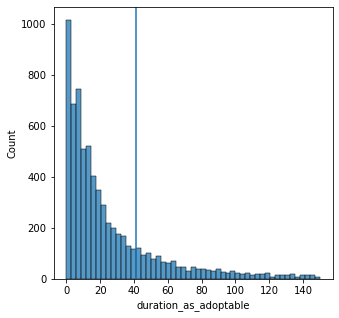

In [128]:
sns.histplot(x='duration_as_adoptable', stat='count', data=adopted, binrange=(0, 150))
plt.axvline(int(adopted.duration_as_adoptable.describe()['mean']))

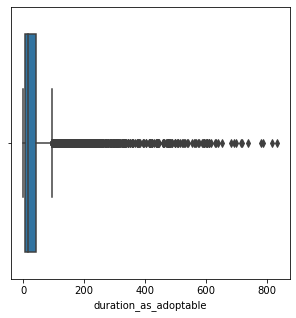

In [129]:
sns.boxplot(data=adopted, x='duration_as_adoptable')

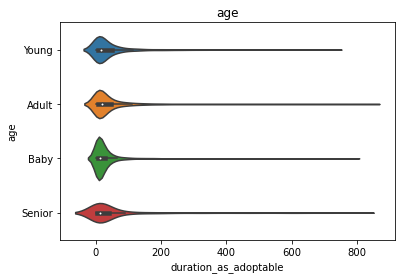

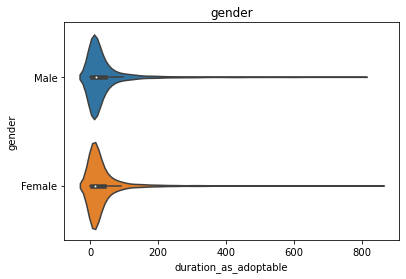

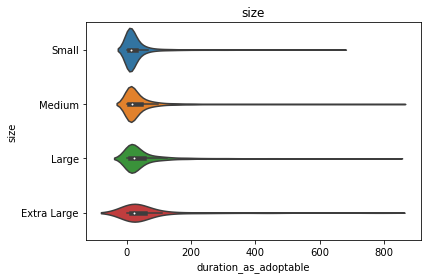

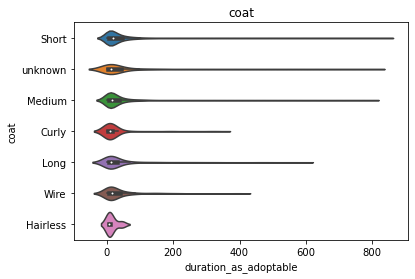

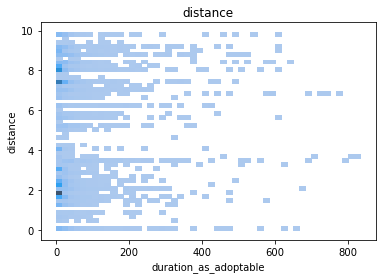

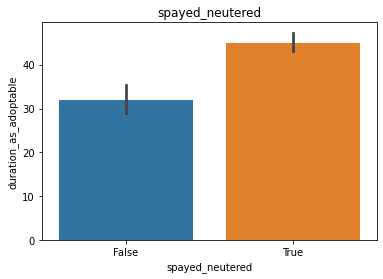

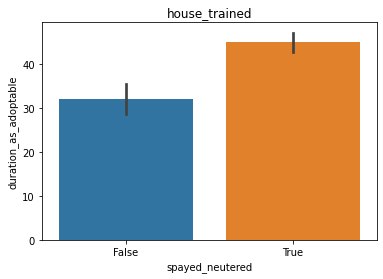

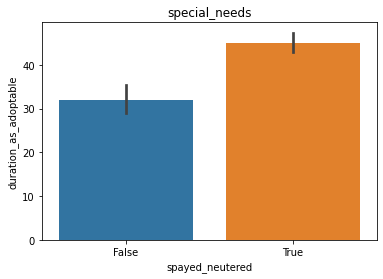

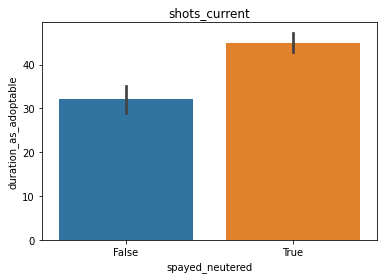

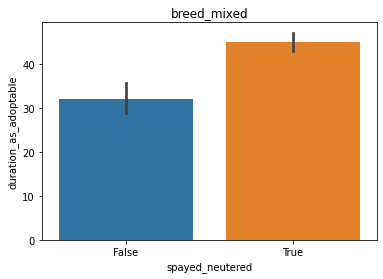

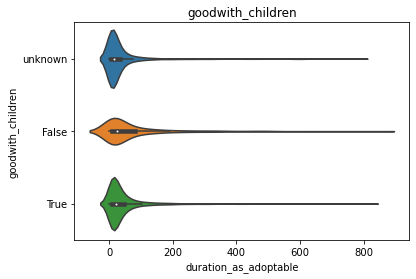

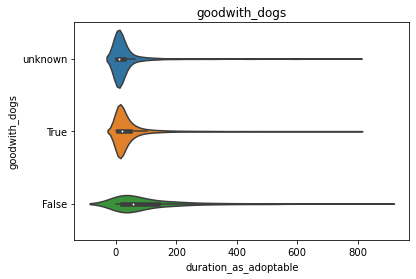

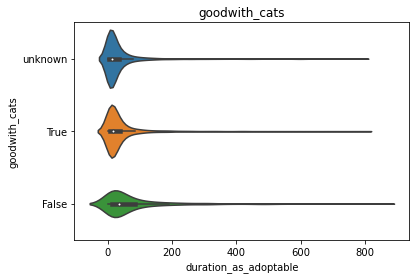

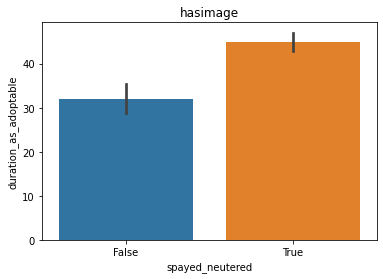

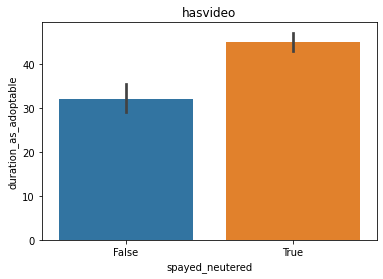

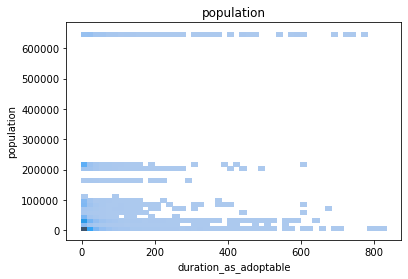

In [22]:
for feat in adopted.drop('duration_as_adoptable', axis=1):
    
    if adopted[feat].dtype == 'bool':
        sns.barplot(x='spayed_neutered', y='duration_as_adoptable', data=adopted)
        plt.title(feat)
        plt.show()
    elif adopted[feat].dtype == 'float64' :
        sns.histplot(x='duration_as_adoptable', y=feat, data=adopted, bins=50)
        plt.title(feat)
        plt.show()
    elif adopted[feat].dtype == 'object' :
        if len(adopted[feat].unique()) <= 10 :
            sns.violinplot(x='duration_as_adoptable', y=feat, data=adopted)
            plt.title(feat)
            plt.show()
#         else :
#             counts = adopted[feat].value_counts()
#             counts.iloc[:10].plot(kind="barh")
#             plt.title(feat)
#             plt.show()
        

**Do larger cities have faster average adoption rates?**

In [23]:
census = pd.read_csv('data/census_wa_cleaned.csv')
census.set_index('index', inplace=True)
census_pop = census.loc[:,'Total population']

In [24]:
# Do larger cities have faster average adoption rates?
city_count = adopted['city'].value_counts(sort=True)
city_count = pd.DataFrame(data=city_count)
city_count = city_count.join(census_pop, how='left')
city_count.head()

,city,Total population
Auburn,67,74527
Bainbridge Island,4,23343
Bellingham,394,82944
Benton City,18,3156
Blaine,15,4905


In [25]:
city_count.rename(columns={'Total population':'population', 'city':'num_adopted'}, inplace=True)
city_count.sort_values('num_adopted', ascending=False).head(10)

,num_adopted,population
Puyallup,738,38720
Woodinville,707,11373
Spokane,605,210695
Seattle,522,653017
Bellingham,394,82944
Longview,346,36619
Othello,288,7624
Tacoma,254,203481
Yakima,254,93261
West Richland,231,13048


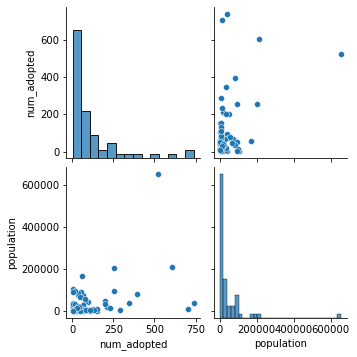

In [26]:
sns.pairplot(city_count)

In [27]:
city_count.corr()

,num_adopted,population
num_adopted,1.00000,0.40793
population,0.40793,1.00000


**A:** The size of a city doesn't have as strong a correlation to adoption rates as I expected

**Does average age affect adoption rates?**

In [28]:
census_avg_age = census.loc[:,'Total population Median age (years)']
census_avg_age.rename('Ave Age', inplace=True)
census_avg_age.head()

index
Aberdeen           35.40000
Aberdeen Gardens   57.60000
Addy               44.40000
Ahtanum            38.20000
Airway Heights     35.70000
Name: Ave Age, dtype: float64

In [29]:
city_count.head()

,num_adopted,population
Auburn,67,74527
Bainbridge Island,4,23343
Bellingham,394,82944
Benton City,18,3156
Blaine,15,4905


In [30]:
city_count = city_count.join(census_avg_age, how='left')
city_count.rename(columns={"Total population Median age (years)":"Avg Age"}, inplace=True)
city_count.head(10)

,num_adopted,population,Ave Age
Auburn,67,74527,35.30000
Bainbridge Island,4,23343,48.20000
Bellingham,394,82944,31.20000
Benton City,18,3156,37.10000
Blaine,15,4905,40.40000
Bonney Lake,1,18516,33.30000
Bothell,93,41207,38.50000
Bremerton,3,39017,32.10000
Burlington,43,8509,35.50000
Cashmere,45,3146,38.10000


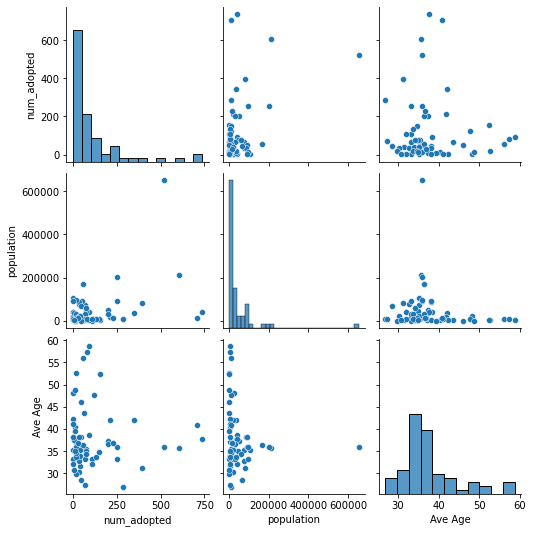

In [31]:
city_count.dropna()
sns.pairplot(city_count)

In [32]:
city_count.corr()

,num_adopted,population,Ave Age
num_adopted,1.00000,0.40793,-0.03375
population,0.40793,1.00000,-0.13925
Ave Age,-0.03375,-0.13925,1.00000


**A: Average age of humans is not a good indicator of pet adoption rate**

In [33]:
# What are the most adopetd breeds? Alternately, what are the most available breeds?

adopted['breed_primary'].value_counts(sort=True)
# adopted['breed_secondary'].value_counts(sort=True)

Chihuahua                               907
Terrier                                 626
Labrador Retriever                      607
Pit Bull Terrier                        403
German Shepherd Dog                     388
Shepherd                                307
Dachshund                               278
Australian Cattle Dog / Blue Heeler     204
Boxer                                   185
Mixed Breed                             170
Australian Shepherd                     147
Border Collie                           146
American Staffordshire Terrier          140
Husky                                   126
Pomeranian                              106
Poodle                                   99
Shih Tzu                                 96
Siberian Husky                           94
Miniature Pinscher                       84
Retriever                                80
Beagle                                   78
Jack Russell Terrier                     73
Yorkshire Terrier               

**What are the most adopted breeds in each city?**

In [34]:
adopted_by_city = adopted.groupby(['city', 'breed_primary']).size().unstack()
adopted_by_city.fillna(0, inplace=True)
adopted_by_city.sample(10)

breed_primary,Affenpinscher,Airedale Terrier,Akita,Alaskan Malamute,American Bulldog,American Bully,American Eskimo Dog,American Staffordshire Terrier,Anatolian Shepherd,Australian Cattle Dog / Blue Heeler,Australian Kelpie,Australian Shepherd,Basenji,Basset Hound,Beagle,Bearded Collie,Belgian Shepherd / Laekenois,Belgian Shepherd / Malinois,Belgian Shepherd / Sheepdog,Belgian Shepherd / Tervuren,Bernese Mountain Dog,Bichon Frise,Black Labrador Retriever,Black Mouth Cur,Black and Tan Coonhound,Bloodhound,Bluetick Coonhound,Boerboel,Bolognese,Border Collie,Border Terrier,Boston Terrier,Bouvier des Flandres,Boxer,Brittany Spaniel,Brussels Griffon,Bull Terrier,Bullmastiff,Cairn Terrier,Canaan Dog,Cane Corso,Carolina Dog,Catahoula Leopard Dog,Cattle Dog,Cavalier King Charles Spaniel,Chesapeake Bay Retriever,Chihuahua,Chinese Crested Dog,Chiweenie,Chocolate Labrador Retriever,Chow Chow,Cockapoo,Cocker Spaniel,Collie,Coonhound,Corgi,Coton de Tulear,Dachshund,Dalmatian,Dandie Dinmont Terrier,Doberman Pinscher,Dogo Argentino,Dogue de Bordeaux,Dutch Shepherd,English Bulldog,English Pointer,English Shepherd,English Springer Spaniel,Flat-Coated Retriever,Fox Terrier,French Bulldog,German Pinscher,German Shepherd Dog,German Shorthaired Pointer,German Wirehaired Pointer,Golden Retriever,Great Dane,Great Pyrenees,Greyhound,Havanese,Hound,Husky,Ibizan Hound,Irish Terrier,Irish Wolfhound,Italian Greyhound,Jack Russell Terrier,Japanese Chin,Jindo,Karelian Bear Dog,Labrador Retriever,Leonberger,Lhasa Apso,Maltese,Maltipoo,Manchester Terrier,Mastiff,Miniature Dachshund,Miniature Pinscher,Miniature Poodle,Miniature Schnauzer,Mixed Breed,Mountain Cur,Neapolitan Mastiff,Newfoundland Dog,Norfolk Terrier,Norwich Terrier,Nova Scotia Duck Tolling Retriever,Papillon,Parson Russell Terrier,Patterdale Terrier / Fell Terrier,Pekingese,Pembroke Welsh Corgi,Pharaoh Hound,Pit Bull Terrier,Plott Hound,Pointer,Pomeranian,Poodle,Pug,Pumi,Rat Terrier,Redbone Coonhound,Retriever,Rhodesian Ridgeback,Rottweiler,Rough Collie,Saint Bernard,Saluki,Samoyed,Schipperke,Schnauzer,Scottish Terrier,Setter,Shar-Pei,Sheep Dog,Shepherd,Shetland Sheepdog / Sheltie,Shiba Inu,Shih Tzu,Shih poo,Siberian Husky,Silky Terrier,Smooth Collie,Spaniel,Spitz,Staffordshire Bull Terrier,Standard Poodle,Standard Schnauzer,Terrier,Thai Ridgeback,Tibetan Spaniel,Tibetan Terrier,Tosa Inu,Toy Fox Terrier,Treeing Walker Coonhound,Vizsla,Weimaraner,Welsh Springer Spaniel,Welsh Terrier,West Highland White Terrier / Westie,Wheaten Terrier,Whippet,White German Shepherd,Wire Fox Terrier,Wirehaired Dachshund,Wirehaired Pointing Griffon,Wirehaired Terrier,Xoloitzcuintli / Mexican Hairless,Yellow Labrador Retriever,Yorkshire Terrier
city,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Union Gap,0.00000,0.00000,2.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,10.00000,0.00000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000,0.00000,3.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000,0.00000,29.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,4.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,5.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,7.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000,0.00000,0.00000,0.00000,1.00000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,18.00000,0.00000,0.00

In [35]:
most_adopted_by_city = adopted_by_city.idxmax(axis=1)
print("Most adopted dog per city:")
most_adopted_by_city

Most adopted dog per city:


city
Auburn                               German Shepherd Dog
Bainbridge Island         American Staffordshire Terrier
Bellingham                            Labrador Retriever
Benton City                                        Boxer
Blaine                                          Shih Tzu
Bonney Lake               American Staffordshire Terrier
Bothell                              German Shepherd Dog
Bremerton                                          Boxer
Burlington                           Australian Shepherd
Cashmere                              Labrador Retriever
Coupeville                                     Chihuahua
Covington                                      Chihuahua
Deer Park                                 Siberian Husky
Elma                                               Jindo
Everett                                        Chihuahua
Federal Way                             Pit Bull Terrier
Ferndale                                       Chihuahua
Friday Harbor             

## Handling outliers

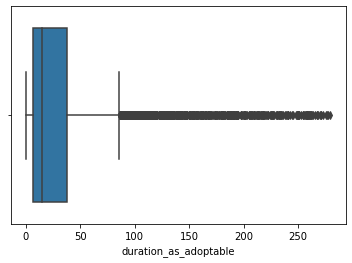

In [36]:
mean = adopted['duration_as_adoptable'].mean()
std = adopted['duration_as_adoptable'].std()
cut_off = std * 3
lower, upper = mean - cut_off, mean + cut_off
adopted_trimmed = adopted[(adopted['duration_as_adoptable'] < upper) & (adopted['duration_as_adoptable'] > lower)]

sns.boxplot(data=adopted_trimmed, x='duration_as_adoptable')


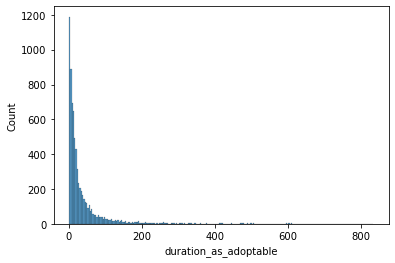

In [37]:
sns.histplot(x='duration_as_adoptable', stat='count', data=adopted)

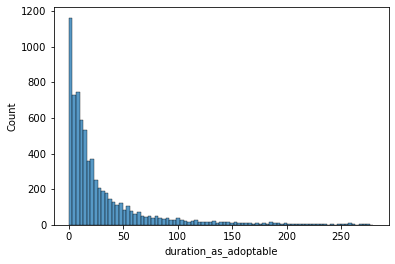

In [38]:
sns.histplot(x='duration_as_adoptable', stat='count', data=adopted_trimmed)

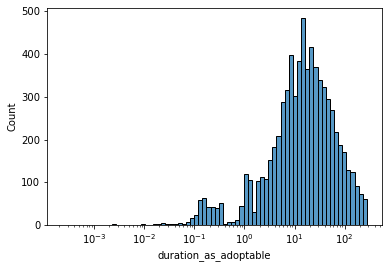

In [39]:
sns.histplot(x='duration_as_adoptable', stat='count', data=adopted_trimmed, log_scale=True)

In [40]:
# save cleaned df_dogs
datapath = 'data'
save_file(adopted_trimmed, 'dogs_trimmed.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)n

Please re-run this cell with a new filename.


# Feature Selection

In [41]:
df = adopted_trimmed[['gender', 'size', 'coat', 'duration_as_adoptable', 'hasimage', 'hasvideo', 'spayed_neutered', 'house_trained', 'special_needs', 'shots_current', 'goodwith_children', 'goodwith_dogs', 'goodwith_cats']]
df.loc[:, ['hasimage', 'hasvideo', 'spayed_neutered', 'house_trained', 'special_needs', 'shots_current']] = adopted_trimmed.loc[:, ['hasimage', 'hasvideo', 'spayed_neutered', 'house_trained', 'special_needs', 'shots_current']].astype('int64')
df = pd.get_dummies(df)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [42]:
df.head()

,duration_as_adoptable,hasimage,hasvideo,spayed_neutered,house_trained,special_needs,shots_current,gender_Female,gender_Male,size_Extra Large,size_Large,size_Medium,size_Small,coat_Curly,coat_Hairless,coat_Long,coat_Medium,coat_Short,coat_Wire,coat_unknown,goodwith_children_False,goodwith_children_True,goodwith_children_unknown,goodwith_dogs_False,goodwith_dogs_True,goodwith_dogs_unknown,goodwith_cats_False,goodwith_cats_True,goodwith_cats_unknown
0,279.39069,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1
1,11.02965,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1
2,257.81421,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1
3,62.86919,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1
5,9.94579,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0


In [43]:
df.describe()

,duration_as_adoptable,hasimage,hasvideo,spayed_neutered,house_trained,special_needs,shots_current,gender_Female,gender_Male,size_Extra Large,size_Large,size_Medium,size_Small,coat_Curly,coat_Hairless,coat_Long,coat_Medium,coat_Short,coat_Wire,coat_unknown,goodwith_children_False,goodwith_children_True,goodwith_children_unknown,goodwith_dogs_False,goodwith_dogs_True,goodwith_dogs_unknown,goodwith_cats_False,goodwith_cats_True,goodwith_cats_unknown
count,7179.00000,7179.00000,7179.00000,7179.00000,7179.00000,7179.00000,7179.00000,7179.00000,7179.00000,7179.00000,7179.00000,7179.00000,7179.00000,7179.00000,7179.00000,7179.00000,7179.00000,7179.00000,7179.00000,7179.00000,7179.00000,7179.00000,7179.00000,7179.00000,7179.00000,7179.00000,7179.00000,7179.00000,7179.00000
mean,31.92057,0.98551,0.03956,0.75902,0.41677,0.02939,0.92283,0.47263,0.52737,0.01490,0.26299,0.34420,0.37791,0.01560,0.00070,0.06157,0.22830,0.52612,0.01950,0.14821,0.08413,0.42415,0.49171,0.03301,0.61443,0.35256,0.11478,0.28305,0.60217
std,44.18359,0.11949,0.19494,0.42771,0.49306,0.16891,0.26688,0.49929,0.49929,0.12118,0.44029,0.47514,0.48490,0.12393,0.02638,0.24039,0.41977,0.49935,0.13829,0.35533,0.27761,0.49425,0.49997,0.17868,0.48676,0.47780,0.31878,0.45051,0.48948
min,0.00023,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,6.07371,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,15.21914,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000
75%,37.99333,1.00000,0.00000,1.00000,1.00000,0.00000,1.00000,1.00000,1.00000,0.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,1.00000,1.00000,0.00000,1.00000,1.00000
max,279.39069,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


In [44]:
# drop one of each of the dummy category columns so those features don't double-weight anything
df.drop(['size_Extra Large', 'gender_Female', 'coat_Hairless', 'goodwith_children_False', 'goodwith_dogs_False', 'goodwith_cats_False'], axis=1, inplace=True)

In [45]:
df_corr = df.corr()
df_corr

,duration_as_adoptable,hasimage,hasvideo,spayed_neutered,house_trained,special_needs,shots_current,gender_Male,size_Large,size_Medium,size_Small,coat_Curly,coat_Long,coat_Medium,coat_Short,coat_Wire,coat_unknown,goodwith_children_True,goodwith_children_unknown,goodwith_dogs_True,goodwith_dogs_unknown,goodwith_cats_True,goodwith_cats_unknown
duration_as_adoptable,1.00000,0.05800,0.03931,0.10183,0.22528,0.09070,-0.00322,0.01916,0.09476,0.03419,-0.12421,-0.04500,-0.01668,-0.02837,0.04299,-0.00155,0.00139,0.06932,-0.12384,0.07891,-0.13878,-0.00048,-0.11127
hasimage,0.05800,1.00000,0.01863,-0.00835,0.05047,0.00039,0.01736,-0.00736,-0.01231,0.01177,-0.00408,0.00586,-0.02714,-0.00627,0.00634,0.00024,0.01448,0.03329,-0.02067,0.03569,-0.03986,0.01666,-0.03185
hasvideo,0.03931,0.01863,1.00000,0.02580,0.08064,-0.00147,0.01584,0.00176,0.01349,0.06956,-0.08007,-0.02555,-0.02523,-0.00143,0.03518,-0.01829,-0.01426,0.05284,-0.05667,0.04331,-0.05404,0.04222,-0.08325
spayed_neutered,0.10183,-0.00835,0.02580,1.00000,0.35608,0.03827,0.35943,0.02372,0.06952,0.00854,-0.06866,-0.02894,0.00476,0.03024,-0.00314,-0.01946,-0.01705,0.03413,-0.10576,0.05686,-0.08322,0.01061,-0.10197
house_trained,0.22528,0.05047,0.08064,0.35608,1.00000,0.06032,0.14070,-0.01635,0.08736,0.05361,-0.14084,-0.04030,-0.00025,0.04100,0.01689,-0.02932,-0.04568,0.20748,-0.26347,0.21455,-0.26188,0.07722,-0.20475
special_needs,0.09070,0.00039,-0.00147,0.03827,0.06032,1.00000,0.00087,0.00780,0.00470,-0.02365,0.01745,0.03799,0.05150,-0.00427,-0.02479,0.03510,-0.02152,0.00752,-0.05238,0.02432,-0.04210,0.04811,-0.05402
shots_current,-0.00322,0.01736,0.01584,0.35943,0.14070,0.00087,1.00000,0.01690,0.00320,-0.04759,0.04991,0.01534,0.00892,0.02671,-0.01728,0.00681,-0.02041,0.00315,-0.01941,0.02616,-0.02915,0.03686,-0.04841
gender_Male,0.01916,-0.00736,0.00176,0.02372,-0.01635,0.00780,0.01690,1.00000,0.07308,-0.09463,0.01337,0.01111,0.01381,-0.00622,-0.02229,0.01043,0.02268,-0.02532,0.00356,-0.00300,0.01356,-0.01463,0.01093
size_Large,0.09476,-0.01231,0.01349,0.06952,0.08736,0.00470,0.00320,0.07308,1.00000,-0.43276,-0.46558,-0.05222,-0.03059,0.11605,-0.06546,-0.07052,0.02242,0.05198,-0.04136,-0.03318,0.00356,-0.00519,-0.07686
size_Medium,0.03419,0.01177,0.06956,0.00854,0.05361,-0.02365,-0.04759,-0.09463,-0.43276,1.00000,-0.56466,-0.06281,-0.10628,0.03483,0.03756,-0.05765,0.02292,0.11860,-0.07801,0.06249,-0.06454,0.00559,-0.01795


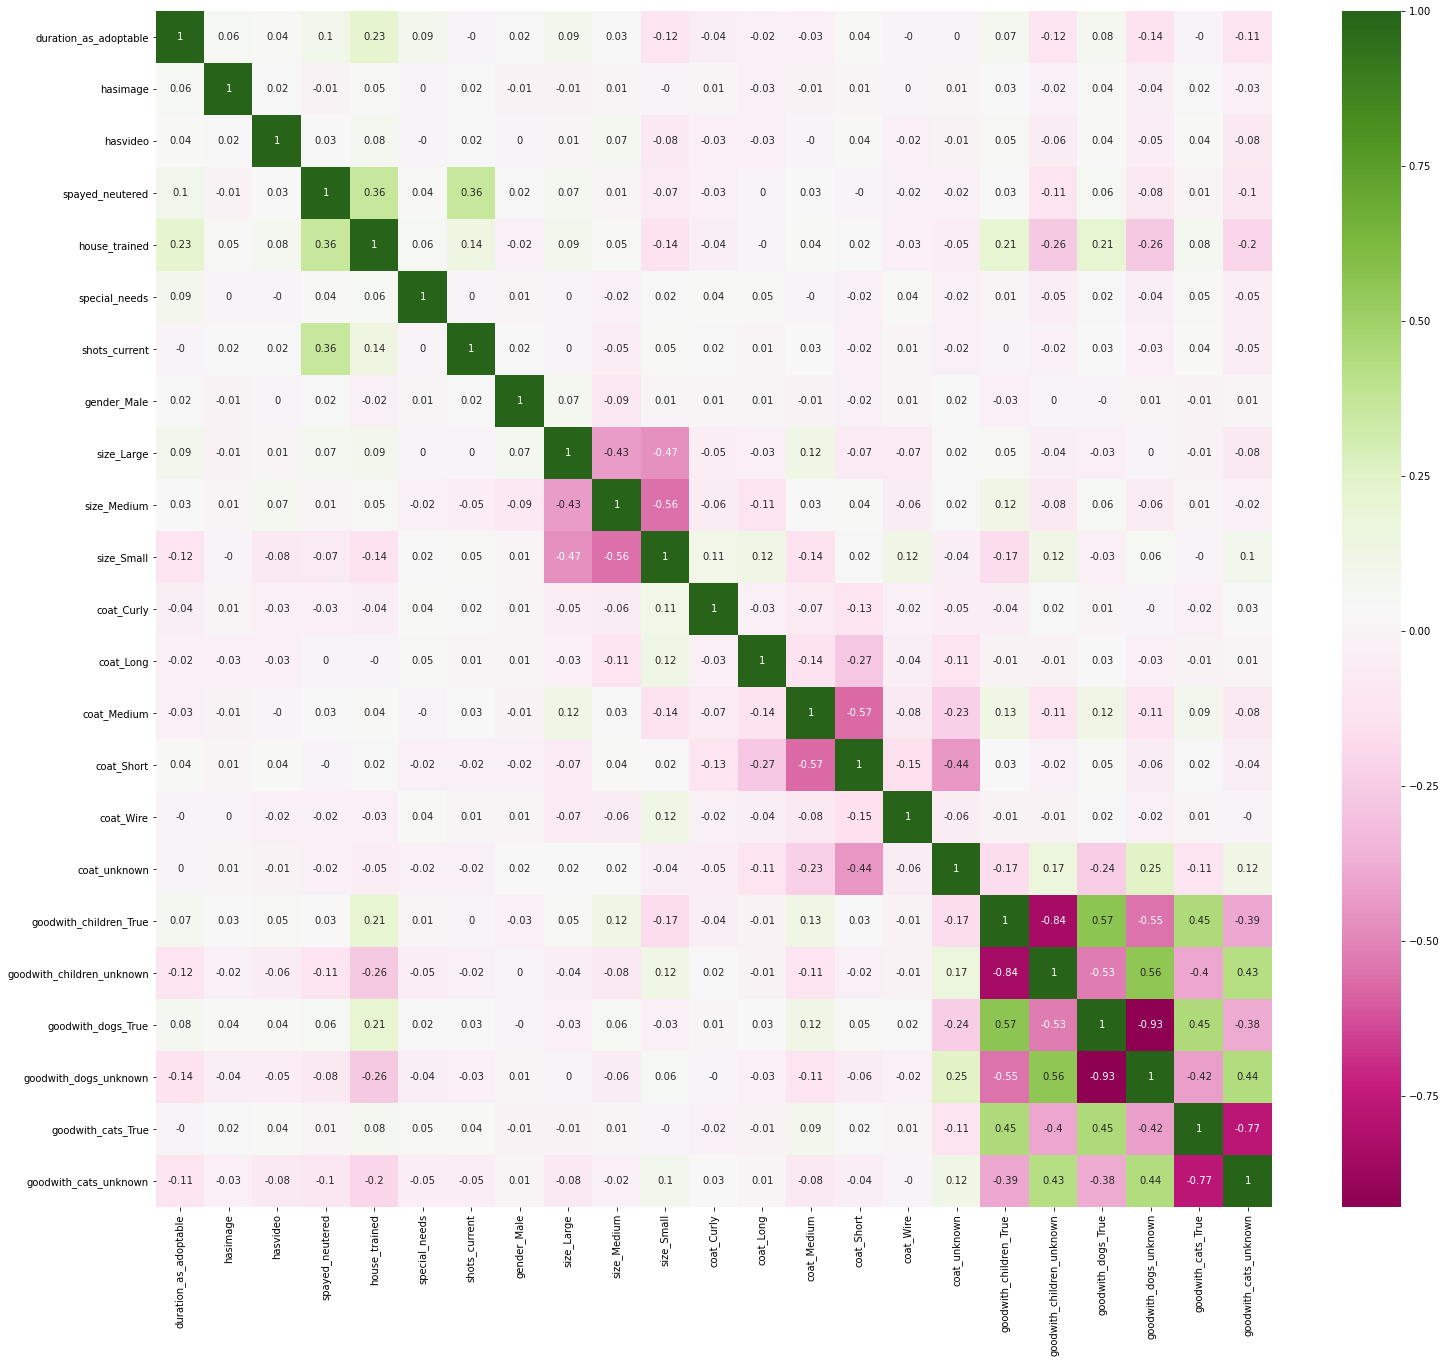

In [46]:
plt.figure(figsize=(25, 22))
sns.heatmap(round(df_corr, 2), annot = True, cmap="PiYG")

In [47]:
df.dtypes

duration_as_adoptable        float64
hasimage                       int64
hasvideo                       int64
spayed_neutered                int64
house_trained                  int64
special_needs                  int64
shots_current                  int64
gender_Male                    uint8
size_Large                     uint8
size_Medium                    uint8
size_Small                     uint8
coat_Curly                     uint8
coat_Long                      uint8
coat_Medium                    uint8
coat_Short                     uint8
coat_Wire                      uint8
coat_unknown                   uint8
goodwith_children_True         uint8
goodwith_children_unknown      uint8
goodwith_dogs_True             uint8
goodwith_dogs_unknown          uint8
goodwith_cats_True             uint8
goodwith_cats_unknown          uint8
dtype: object

In [48]:
len(df) * .7, len(df) * .3

(5025.299999999999, 2153.7)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='duration_as_adoptable'), 
                                                    df.duration_as_adoptable, test_size=0.3, 
                                                    random_state=192)

In [50]:
X_train.shape, X_test.shape

((5025, 22), (2154, 22))

In [51]:
y_train.shape, y_test.shape

((5025,), (2154,))

## Using Random Forest Model

In [52]:
RF_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(random_state=192)
)

In [53]:
rf_default_results = cross_validate(RF_pipe, X_train, y_train, cv=5)

In [54]:
rf_cv_scores = rf_default_results['test_score']
rf_cv_scores

array([-0.08069215,  0.01770795, -0.00222841, -0.04738011,  0.01397856])

In [55]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(-0.019722832314553608, 0.038275538511327506)

In [56]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [57]:
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [58]:
from sklearn.utils import parallel_backend

with parallel_backend('threading'):
    rf_grid_cv.fit(X_train, y_train)

In [59]:
rf_grid_cv.best_params_

{'randomforestregressor__n_estimators': 379,
 'simpleimputer__strategy': 'mean',
 'standardscaler': StandardScaler()}

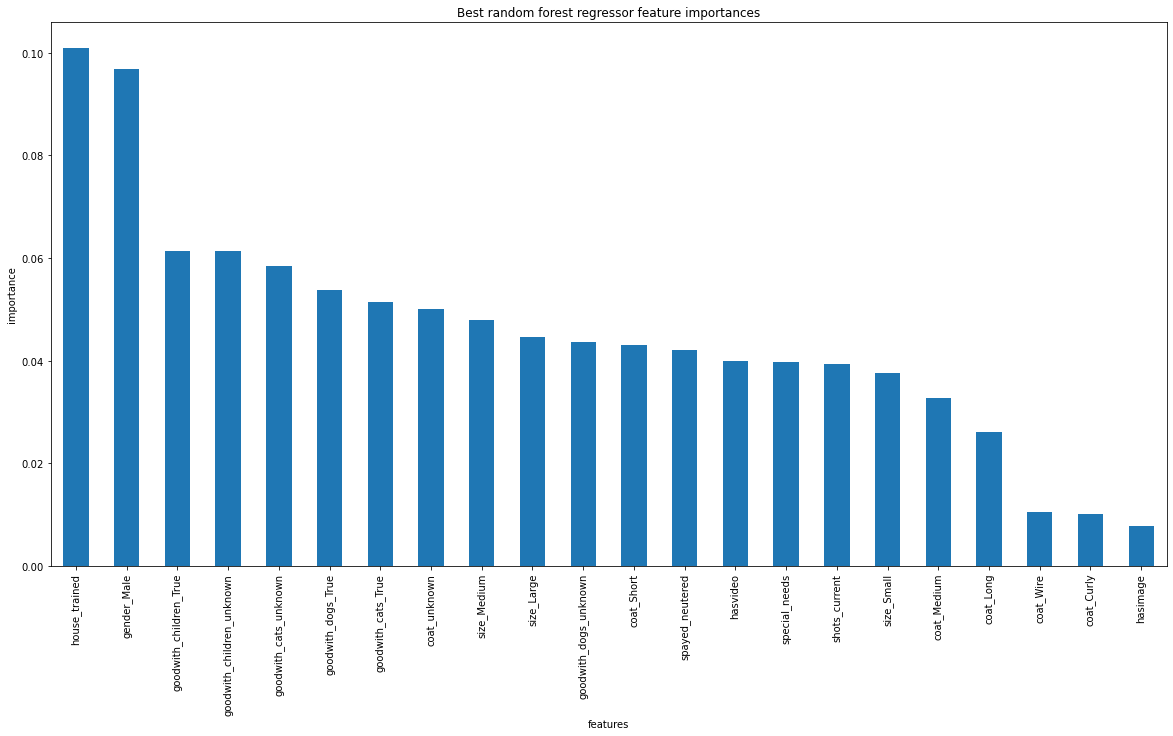

In [60]:
plt.subplots(figsize=(20, 10))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

In [61]:
rf_model = RandomForestRegressor(n_estimators=379, random_state=192)
rf_model.fit(X_train,y_train)

pred_rf = rf_model.predict(X_test)

In [62]:
rmse_rf = np.sqrt(mean_squared_error(y_test, pred_rf))
print("RMSE : % f" %(rmse_rf))
print("RMSE/SD: % f" %(rmse_rf/adopted.duration_as_adoptable.std()))

RMSE :  44.856279
RMSE/SD:  0.566602


## Using XG Boost Model

In [63]:
import xgboost as xgb

In [64]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror',
                  n_estimators = 10, seed = 192)

In [65]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

y_test.shape, preds.shape

/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


((2154,), (2154,))

In [66]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))
print("RMSE/SD: % f" %(rmse/adopted.duration_as_adoptable.std()))

RMSE: 42.586288
RMSE/SD:  0.537929


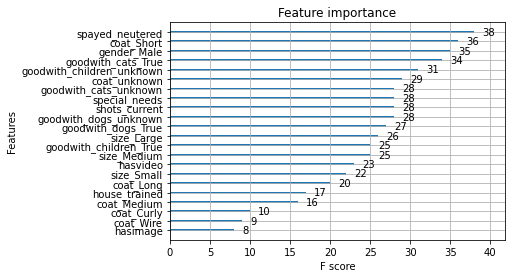

In [67]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [68]:
y_train.shape

(5025,)

In [69]:
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

In [70]:
param = {
    "booster":"gblinear", 
    "objective":"reg:squarederror"} 

steps = 20

In [71]:
xgb_r = xgb.train(params = param, dtrain = D_train, num_boost_round = 10)
pred = xgb_r.predict(D_test)

In [72]:
rmse = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE : % f" %(rmse))
print("RMSE/SD: % f" %(rmse/adopted.duration_as_adoptable.std()))

RMSE :  42.457386
RMSE/SD:  0.536301


## Using f_regression

In [86]:
from sklearn.feature_selection import f_regression
import math
import operator

In [87]:
f_val, p_val = f_regression(X_train, y_train)

In [101]:
f_val_dict = {}
p_val_dict = {}
n_features=22

for i in range(len(f_val)):
        if math.isnan(f_val[i]):
            f_val[i] = 0.0
        f_val_dict[i] = f_val[i]
        if math.isnan(p_val[i]):
            p_val[i] = 0.0
        p_val_dict[i] = p_val[i]
    
sorted_f = sorted(f_val_dict.items(), key=operator.itemgetter(1),reverse=True)
sorted_p = sorted(p_val_dict.items(), key=operator.itemgetter(1),reverse=True)

feature_indexs = []
for i in range(0,n_features):
    feature_indexs.append(sorted_f[i][0])

feature_indexs

[3, 19, 17, 9, 21, 2, 7, 18, 4, 16, 0, 1, 13, 12, 10, 6, 8, 15, 11, 14, 20, 5]

In [106]:
X_train.iloc[:,feature_indexs].columns

Index(['house_trained', 'goodwith_dogs_unknown', 'goodwith_children_unknown',
       'size_Small', 'goodwith_cats_unknown', 'spayed_neutered', 'size_Large',
       'goodwith_dogs_True', 'special_needs', 'goodwith_children_True',
       'hasimage', 'hasvideo', 'coat_Short', 'coat_Medium', 'coat_Curly',
       'gender_Male', 'size_Medium', 'coat_unknown', 'coat_Long', 'coat_Wire',
       'goodwith_cats_True', 'shots_current'],
      dtype='object')

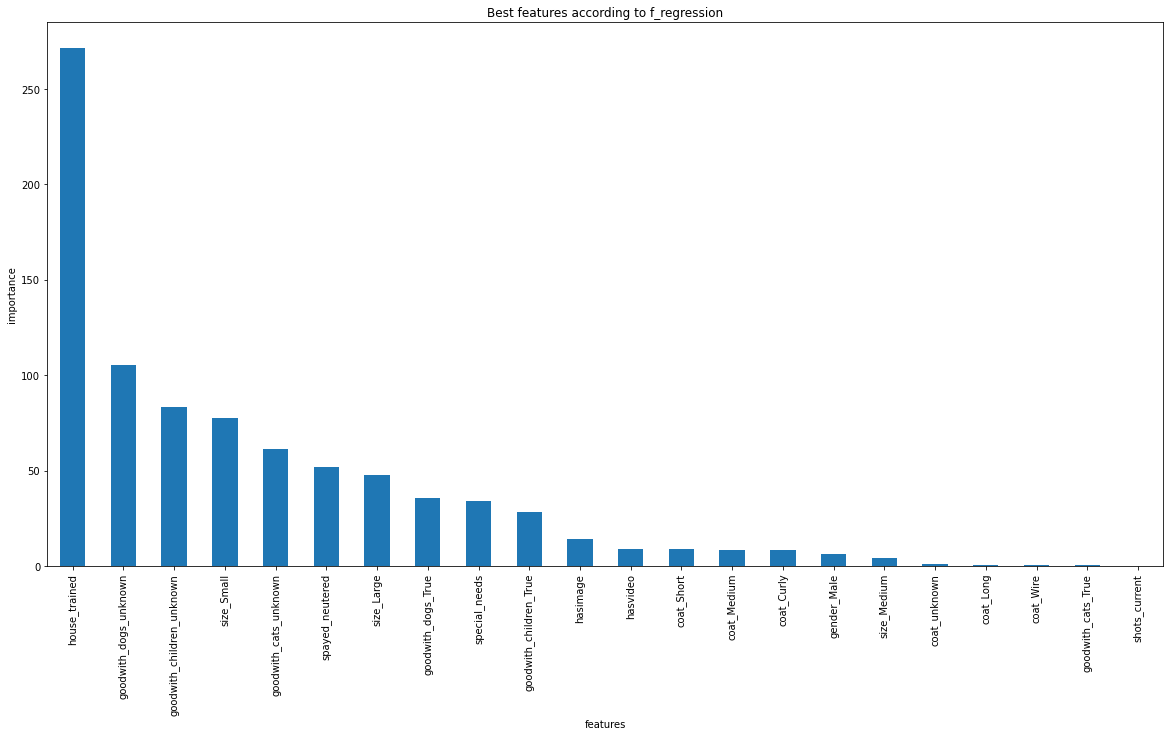

In [108]:
plt.subplots(figsize=(20, 10))
rf_feat_imps = pd.Series(f_val, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best features according to f_regression');

## PCA
**For kicks and giggles**

In [60]:
from sklearn.decomposition import PCA

In [61]:
pca = PCA(n_components=10)
pca.fit_transform(X_train, y_train)

array([[ 0.28981858, -0.01545555,  1.00962167, ..., -0.82175326,
         0.15759315, -0.57719897],
       [ 0.3573454 ,  0.06402393,  0.25360104, ..., -0.88232383,
         0.40344835, -0.39188003],
       [-0.48986741,  0.05211067,  0.05914384, ...,  0.09157839,
        -0.0195628 , -0.649945  ],
       ...,
       [-0.32725865,  0.24982033,  0.07221956, ..., -0.9606608 ,
         0.20816537, -0.52707503],
       [-0.75523721, -0.2282236 ,  1.10257119, ...,  0.1977396 ,
         0.03068389, -0.02898041],
       [-0.75523721, -0.2282236 ,  1.10257119, ...,  0.1977396 ,
         0.03068389, -0.02898041]])

In [62]:
features = range(pca.n_components_)

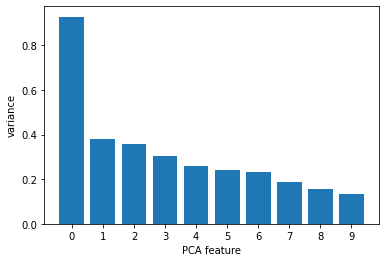

In [63]:
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel("variance")
plt.xlabel("PCA feature")
plt.show()

In [64]:
pca_components = pd.DataFrame(pca.components_,columns=X_train.columns,index = ['PC-1','PC-2', 'PC-3', 'PC-4', 'PC-5', 'PC-6', 'PC-7', 'PC-8', 'PC-9', 'PC-10'])
pca_components

,hasimage,hasvideo,spayed_neutered,house_trained,special_needs,shots_current,gender_Male,size_Large,size_Medium,size_Small,coat_Curly,coat_Long,coat_Medium,coat_Short,coat_Wire,coat_unknown,goodwith_children_True,goodwith_children_unknown,goodwith_dogs_True,goodwith_dogs_unknown,goodwith_cats_True,goodwith_cats_unknown
PC-1,-0.00579,-0.01924,-0.07253,-0.20318,-0.00997,-0.01806,0.01272,-0.02064,-0.07011,0.09474,0.00348,0.00045,-0.07592,-0.02934,0.00343,0.09792,-0.41802,0.42385,-0.41433,0.41614,-0.31690,0.34964
PC-2,-0.00399,-0.01124,-0.10404,-0.15500,0.00406,-0.00262,0.04848,-0.27121,-0.34806,0.61729,0.01206,0.01960,-0.34393,0.44802,0.01384,-0.15036,-0.03745,0.02032,0.11576,-0.09904,0.12393,-0.06449
PC-3,0.00466,0.02475,0.03051,0.09918,-0.00870,-0.01422,-0.17401,-0.21755,0.55269,-0.33615,-0.01953,-0.07591,-0.35745,0.57475,-0.02237,-0.09856,0.00870,0.01493,-0.04679,0.03134,-0.09682,0.07035
PC-4,0.00128,0.01880,0.30391,0.38210,0.00603,0.07741,0.29721,0.55373,-0.38626,-0.17550,-0.01430,-0.02958,-0.20931,0.32466,-0.01762,-0.05313,-0.04767,-0.00185,-0.10948,0.06323,-0.07768,-0.05082
PC-5,-0.00080,-0.00132,-0.45458,-0.58106,-0.01424,-0.14848,0.24328,0.30821,-0.01179,-0.30249,-0.01113,-0.04802,-0.05579,0.15764,-0.01191,-0.03037,0.08199,-0.00322,-0.09465,0.10925,0.26611,-0.24034
PC-6,-0.00223,0.01142,0.07049,0.05244,0.00904,0.02932,-0.77094,0.15531,-0.14636,-0.00170,-0.00518,-0.00726,-0.04900,0.00667,-0.00277,0.05695,-0.12887,0.12116,-0.19140,0.15214,0.31057,-0.39750
PC-7,0.00008,-0.01208,-0.25278,-0.13103,-0.01669,-0.08380,-0.46935,0.29764,-0.24513,-0.04902,-0.00088,-0.00118,0.06262,0.12153,-0.00559,-0.17637,0.24239,-0.18700,0.15376,-0.13869,-0.37807,0.45907
PC-8,-0.00025,-0.00597,-0.00476,0.04377,0.00372,-0.01219,0.01037,-0.10595,-0.03319,0.13228,0.00320,0.03452,-0.26396,-0.09580,0.00429,0.31717,0.46181,-0.51391,-0.39765,0.38600,-0.01609,0.05006
PC-9,0.00768,0.00051,-0.27069,0.13985,0.00272,-0.12665,-0.02960,0.09985,-0.01935,-0.07735,0.01467,0.08271,-0.52470,-0.19597,0.01659,0.60627,-0.12489,0.14186,0.27700,-0.26534,-0.03830,0.03033
PC-10,0.01393,0.02323,-0.65361,0.61960,0.00979,-0.24695,0.06027,-0.07095,-0.00932,0.06606,-0.00210,-0.03742,0.18561,0.03542,-0.00055,-0.18142,-0.02975,0.04163,-0.14235,0.11433,0.02649,-0.08527


In [65]:
abs(pca_components.loc['PC-1', :]).sort_values(ascending=False )

goodwith_children_unknown   0.42385
goodwith_children_True      0.41802
goodwith_dogs_unknown       0.41614
goodwith_dogs_True          0.41433
goodwith_cats_unknown       0.34964
goodwith_cats_True          0.31690
house_trained               0.20318
coat_unknown                0.09792
size_Small                  0.09474
coat_Medium                 0.07592
spayed_neutered             0.07253
size_Medium                 0.07011
coat_Short                  0.02934
size_Large                  0.02064
hasvideo                    0.01924
shots_current               0.01806
gender_Male                 0.01272
special_needs               0.00997
hasimage                    0.00579
coat_Curly                  0.00348
coat_Wire                   0.00343
coat_Long                   0.00045
Name: PC-1, dtype: float64

In [66]:
abs(pca_components.loc['PC-2', :]).sort_values(ascending=False )

size_Small                  0.61729
coat_Short                  0.44802
size_Medium                 0.34806
coat_Medium                 0.34393
size_Large                  0.27121
house_trained               0.15500
coat_unknown                0.15036
goodwith_cats_True          0.12393
goodwith_dogs_True          0.11576
spayed_neutered             0.10404
goodwith_dogs_unknown       0.09904
goodwith_cats_unknown       0.06449
gender_Male                 0.04848
goodwith_children_True      0.03745
goodwith_children_unknown   0.02032
coat_Long                   0.01960
coat_Wire                   0.01384
coat_Curly                  0.01206
hasvideo                    0.01124
special_needs               0.00406
hasimage                    0.00399
shots_current               0.00262
Name: PC-2, dtype: float64

In [67]:
abs(pca_components.loc['PC-3', :]).sort_values(ascending=False )

coat_Short                  0.57475
size_Medium                 0.55269
coat_Medium                 0.35745
size_Small                  0.33615
size_Large                  0.21755
gender_Male                 0.17401
house_trained               0.09918
coat_unknown                0.09856
goodwith_cats_True          0.09682
coat_Long                   0.07591
goodwith_cats_unknown       0.07035
goodwith_dogs_True          0.04679
goodwith_dogs_unknown       0.03134
spayed_neutered             0.03051
hasvideo                    0.02475
coat_Wire                   0.02237
coat_Curly                  0.01953
goodwith_children_unknown   0.01493
shots_current               0.01422
special_needs               0.00870
goodwith_children_True      0.00870
hasimage                    0.00466
Name: PC-3, dtype: float64